# 1) Generate random graph:
Write a function to generate a random directed acyclic graph with V number of vertices and E number of edges.

In [1]:
import random

def generate_dag(V, E, seed=None):
    graph = {i: set() for i in range(V)}
    edges = []
    for i in range(V):
        for j in range(i+1, V):
            edges.append((i,j))
    if seed is not None:
        random.seed(seed)
    random.shuffle(edges)
    for i in range(E):
        u, v = edges[i]
        if u < v and not any(u in graph[p] for p in graph[v]):
            graph[u].add(v)
    return graph

# 2) Visualize graph:
Generate one random directed acyclic graph with 20 vertices and 20 edges. Generate a graphical representation of the graph: use circles to represent vertices and arrow to represent edges. Label the circles with the name of the corresponding vertices

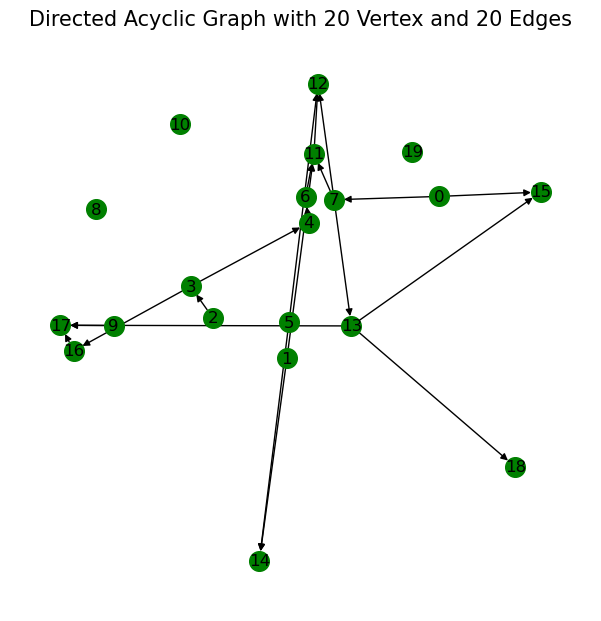

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

random.seed(123)
graph = generate_dag(20, 20)

G = nx.DiGraph()
for u in graph:
    G.add_node(u)
for u in graph:
    for v in graph[u]:
        G.add_edge(u, v)

pos = nx.spring_layout(G)  # Change layout to spring_layout
node_size = 200  # Reduce node size
node_color = 'green'  # Change node color
edge_color = 'black'  # Change edge color

fig=plt.figure(figsize=(7.5,7.5))  # Adjust figure size
nx.draw_networkx(G, pos, with_labels=True, arrows=True, node_size=node_size, node_color=node_color, edge_color=edge_color)
plt.title('Directed Acyclic Graph with 20 Vertex and 20 Edges',fontsize = 15)
plt.axis('off')  # Turn off axis
plt.show()
fig.savefig('Pic1.png', dpi=fig.dpi)

# 3) Enumerate paths:
Write a function to enumerate all directed paths between two variables Vi and Vj in a directed acyclic graph G. (e.g. in the graph from 2), all directed paths between a and d are: a->b->d and a->c->d). Demonstrate how your function works using the graph you generated from step 2).

In [3]:
def enumerate_directed_paths(G, u, v):
    if u == v:
        return [[u]]
    paths = []
    for neighbor in G[u]:
        for path in enumerate_directed_paths(G, neighbor, v):
            paths.append([u] + path)
    return paths

In [4]:
for i in range(20):
    for j in range(20):
        paths = enumerate_directed_paths(G, i, j)
        print(f"All paths from {i} to {j}: {paths}")

All paths from 0 to 0: [[0]]
All paths from 0 to 1: []
All paths from 0 to 2: []
All paths from 0 to 3: []
All paths from 0 to 4: []
All paths from 0 to 5: []
All paths from 0 to 6: []
All paths from 0 to 7: [[0, 7]]
All paths from 0 to 8: []
All paths from 0 to 9: []
All paths from 0 to 10: []
All paths from 0 to 11: [[0, 7, 11]]
All paths from 0 to 12: [[0, 7, 11, 12], [0, 7, 12]]
All paths from 0 to 13: [[0, 7, 13]]
All paths from 0 to 14: []
All paths from 0 to 15: [[0, 15], [0, 7, 13, 15]]
All paths from 0 to 16: []
All paths from 0 to 17: [[0, 7, 13, 17]]
All paths from 0 to 18: [[0, 7, 13, 18]]
All paths from 0 to 19: []
All paths from 1 to 0: []
All paths from 1 to 1: [[1]]
All paths from 1 to 2: []
All paths from 1 to 3: []
All paths from 1 to 4: []
All paths from 1 to 5: []
All paths from 1 to 6: []
All paths from 1 to 7: []
All paths from 1 to 8: []
All paths from 1 to 9: []
All paths from 1 to 10: []
All paths from 1 to 11: [[1, 11]]
All paths from 1 to 12: [[1, 11, 12]]
Al

# 4) Generate data according to the structure of the graph:
Generate data based on the graph you created in 2) in the following fashion: Any variable without any parent are random variable following Gaussian distribution with mean 0 standard deviation of 1 ; any variable with parents are the sum of their parents plus a Gaussian noise term with mean 0 and standard deviation of 1. Generate 1000 observations.

In [5]:
import numpy as np

np.random.seed(123)

# Create an array to store the data
data = np.zeros((1000, 20))

# Generate data for the root nodes
for u in graph:
    if len(graph[u]) == 0:
        data[:, u] = np.random.normal(loc=0, scale=1, size=1000)

# Generate data for the non-root nodes
for u in graph:
    if len(graph[u]) > 0:
        for i in range(1000):
            noise = np.random.normal(loc=0, scale=1)
            parent_sum = sum(data[i, v] for v in graph[u])
            data[i, u] = parent_sum + noise   
            
import pandas as pd
col=['V0','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19']
data=pd.DataFrame(data,columns=col)
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,-0.794196,0.680940,-1.240970,1.137490,-1.363852,-2.372666,0.101160,-0.866659,-1.085631,0.610476,-0.748827,-2.646097,-1.774224,2.159767,-0.450599,-0.471276,0.295080,0.318764,0.226907,1.117849
1,1.585233,0.288080,-0.312947,0.337157,-0.594763,-1.727497,0.622773,0.483840,0.997345,1.771199,0.567595,-1.263664,-1.201377,0.507914,0.609590,1.084072,1.121253,1.511104,-2.398554,-0.005727
2,-0.243291,1.565892,-0.848947,0.701620,1.143791,5.303926,-0.796028,-0.020053,0.282978,-1.134590,0.718151,1.174898,1.096257,-1.715183,1.173744,-0.379223,-3.649770,-1.136627,-0.447858,1.518394
3,0.034740,0.329817,2.377953,0.502177,-1.097533,2.344109,-0.384673,1.014611,-1.506295,1.410335,-0.999381,1.738577,0.861037,0.826946,0.871815,-0.362274,0.181522,0.642460,0.197384,-0.733533
4,-0.948057,0.391338,0.657501,2.059647,-0.462095,1.375924,-0.683066,-1.464614,-0.578600,-3.141519,0.474898,-1.277843,-1.520367,-2.583065,1.904723,-0.681071,0.291699,-1.127882,0.627365,-1.740812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.616021,-1.505870,-0.057424,-0.878851,-0.897436,-1.031431,1.380951,0.142103,0.634763,-0.108619,0.845701,-0.432794,-0.075335,0.891119,-0.907952,-1.122270,-0.968765,-0.021511,0.461053,0.758545
996,-0.284159,-3.215976,-0.394731,1.399144,0.229728,-1.606933,2.602621,0.087000,1.069919,1.059096,-1.119923,0.150402,-0.946199,0.293548,-1.818045,-1.418638,1.451182,1.709793,-1.417436,0.582465
997,-2.513693,-0.594999,-0.370076,-2.387796,0.678227,2.639647,-1.829346,2.824439,-0.909327,1.917552,-0.359297,2.706083,2.040432,-0.795048,-0.122733,-1.859715,-0.077923,1.324917,0.875113,-1.607035
998,0.929719,2.376450,-0.491447,-0.360841,1.575832,2.552386,0.974179,0.652826,0.470264,0.041148,-1.609695,-0.193159,1.015917,3.051651,1.794486,0.913822,0.593778,-0.450763,0.453500,-0.390761


In [6]:
Mean=data.mean()
Variance=data.var()
Scale=pd.concat([Mean,Variance],axis=1)
Scale.columns = ['Mean','Variance']
Scale
# Feature scaling seems necessary as some feature have unit variance different than 1
# for the sake of conveniece just ignore it to avoid adding unncessary bias in the data

,Mean,Variance
V0,0.094449,2.166986
V1,0.050830,1.988379
V2,0.061484,1.014245
V3,0.021152,0.964840
V4,0.052199,1.097178
V5,0.109042,3.034197
V6,-0.038374,0.955927
V7,0.019655,2.061269
V8,-0.039564,1.002578
V9,-0.005565,1.950068


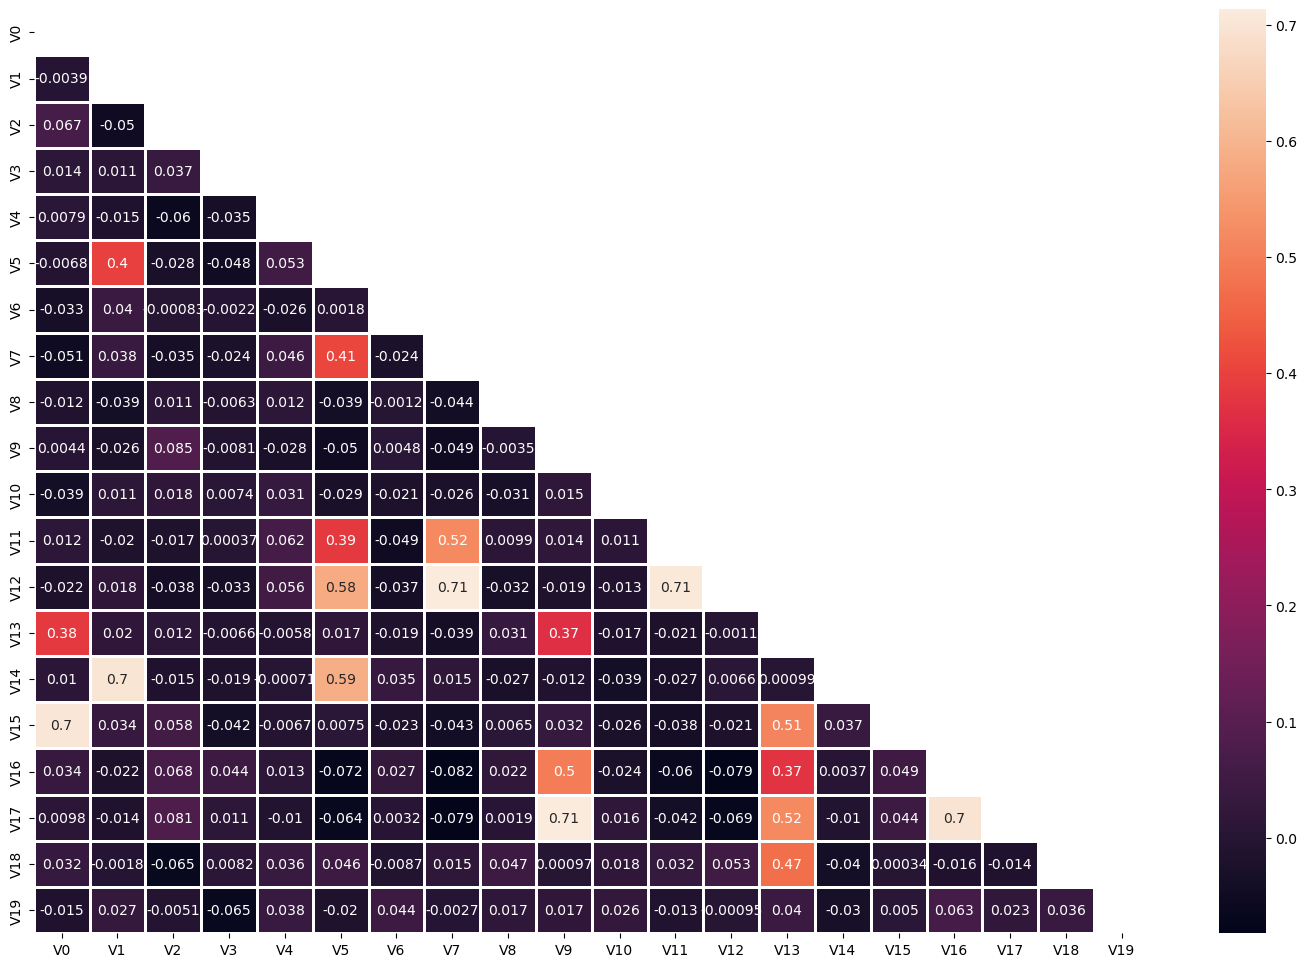

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig=plt.figure(figsize = (18, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()
fig.savefig('Pic2.png', dpi=fig.dpi)
# Most of the pairwise correlation are low, some high correlation might indicates connected vertex which make sense.

# 5) Predictive modeling:
Create predictive model using the data you generated in step 4) with the following specifications: <br>
Target variable for prediction: randomly pick a variable that have more than one neighbor as the target of prediction. <br>
Features: all other variables that are not the target are potential predictors/features. <br>
Feature selection and regression algorithm: use your favorite methods for feature selection and regression. You can use a pre-existing implementation. <br>
Validation: use 800 samples for training and 200 sample for validation. <br>
Performance metric: use your favorite metric(s) <br>
Report the following: (1) the performance metric (2) what features are selected by the feature selector, and (3) the graph distances of the selected features to the target.

In [8]:
for i in range(20):
    paths = enumerate_directed_paths(G, i, 13)
    print(f"All paths from {i} to {13}: {paths}")

All paths from 0 to 13: [[0, 7, 13]]
All paths from 1 to 13: []
All paths from 2 to 13: []
All paths from 3 to 13: []
All paths from 4 to 13: []
All paths from 5 to 13: []
All paths from 6 to 13: []
All paths from 7 to 13: [[7, 13]]
All paths from 8 to 13: []
All paths from 9 to 13: []
All paths from 10 to 13: []
All paths from 11 to 13: []
All paths from 12 to 13: []
All paths from 13 to 13: [[13]]
All paths from 14 to 13: []
All paths from 15 to 13: []
All paths from 16 to 13: []
All paths from 17 to 13: []
All paths from 18 to 13: []
All paths from 19 to 13: []


In [9]:
for i in range(20):
    paths = enumerate_directed_paths(G, 13, i)
    print(f"All paths from {13} to {i}: {paths}")

All paths from 13 to 0: []
All paths from 13 to 1: []
All paths from 13 to 2: []
All paths from 13 to 3: []
All paths from 13 to 4: []
All paths from 13 to 5: []
All paths from 13 to 6: []
All paths from 13 to 7: []
All paths from 13 to 8: []
All paths from 13 to 9: []
All paths from 13 to 10: []
All paths from 13 to 11: []
All paths from 13 to 12: []
All paths from 13 to 13: [[13]]
All paths from 13 to 14: []
All paths from 13 to 15: [[13, 15]]
All paths from 13 to 16: []
All paths from 13 to 17: [[13, 17]]
All paths from 13 to 18: [[13, 18]]
All paths from 13 to 19: []


In [10]:
# Let's choose vertices 13 as the target variable, since it's highly correlated with some vertex, connected to some vertex before and after

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data.drop('V13', axis=1)  # Features
y = data['V13']  # Target variable

# Split the data into train and validation sets with 80/20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

lasso = Lasso(alpha=0.2) # Default regularized parameter alpha=1
lasso.fit(X_train, y_train)

# Get the predicted values on the validation set
y_pred = lasso.predict(X_val)

# Calculate MSE on the validation set
mse = mean_squared_error(y_val, y_pred)
print('Mean Squared Error (MSE):', mse)

# Display selected features and coefficients
selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]
intercept = lasso.intercept_

# Create a DataFrame to display the selected features, coefficients, and intercept
coef_df = pd.DataFrame({'Feature': ['Intercept'] + selected_features.tolist(), 
                        'Coefficient': [intercept] + coefficients.tolist()})
print(coef_df)

Mean Squared Error (MSE): 1.0754122972336508
     Feature  Coefficient
0  Intercept     0.045987
1         V0     0.059899
2        V15     0.737086
3        V16     0.009586
4        V17     0.831533
5        V18     0.765127


In [11]:
print(enumerate_directed_paths(G,0,13))  # Graph distance is 2
print(enumerate_directed_paths(G,13,15)) # Graph distance is 1
print(enumerate_directed_paths(G,13,16)) # Graph distance is infinity
print(enumerate_directed_paths(G,13,17)) # Graph distance is 1
print(enumerate_directed_paths(G,13,18)) # Graph distance is 1

[[0, 7, 13]]
[[13, 15]]
[]
[[13, 17]]
[[13, 18]]


From the graph there are 5 possible path connect to V13 and from V13 specifically: <br>
[0, 7, 13] <br>
[7, 13] <br>
[13, 15] <br>
[13, 17] <br>
[13, 18] <br>

4 out of 5 possible path is chosen by the model, [7,13] is missing could be because it's included in [0, 7, 13], [13,16] is selected mistakenly due to noise. Hence, by coincidence we can conclude that to predict a vertex, we should selected all the vertex connected to and before after it.

# 6) Data generation Graph and Predictive Performance:
Generate 100 random directed acyclic graph with 20 vertices and 20 edges. Go through step 4)
and 5) for each random graph. Plot the histogram for the performance metric(s) you obtain for
the 100 random graphs. What factors may contribute to the variability in the performance
metric? Demonstrate with the data/results you have.

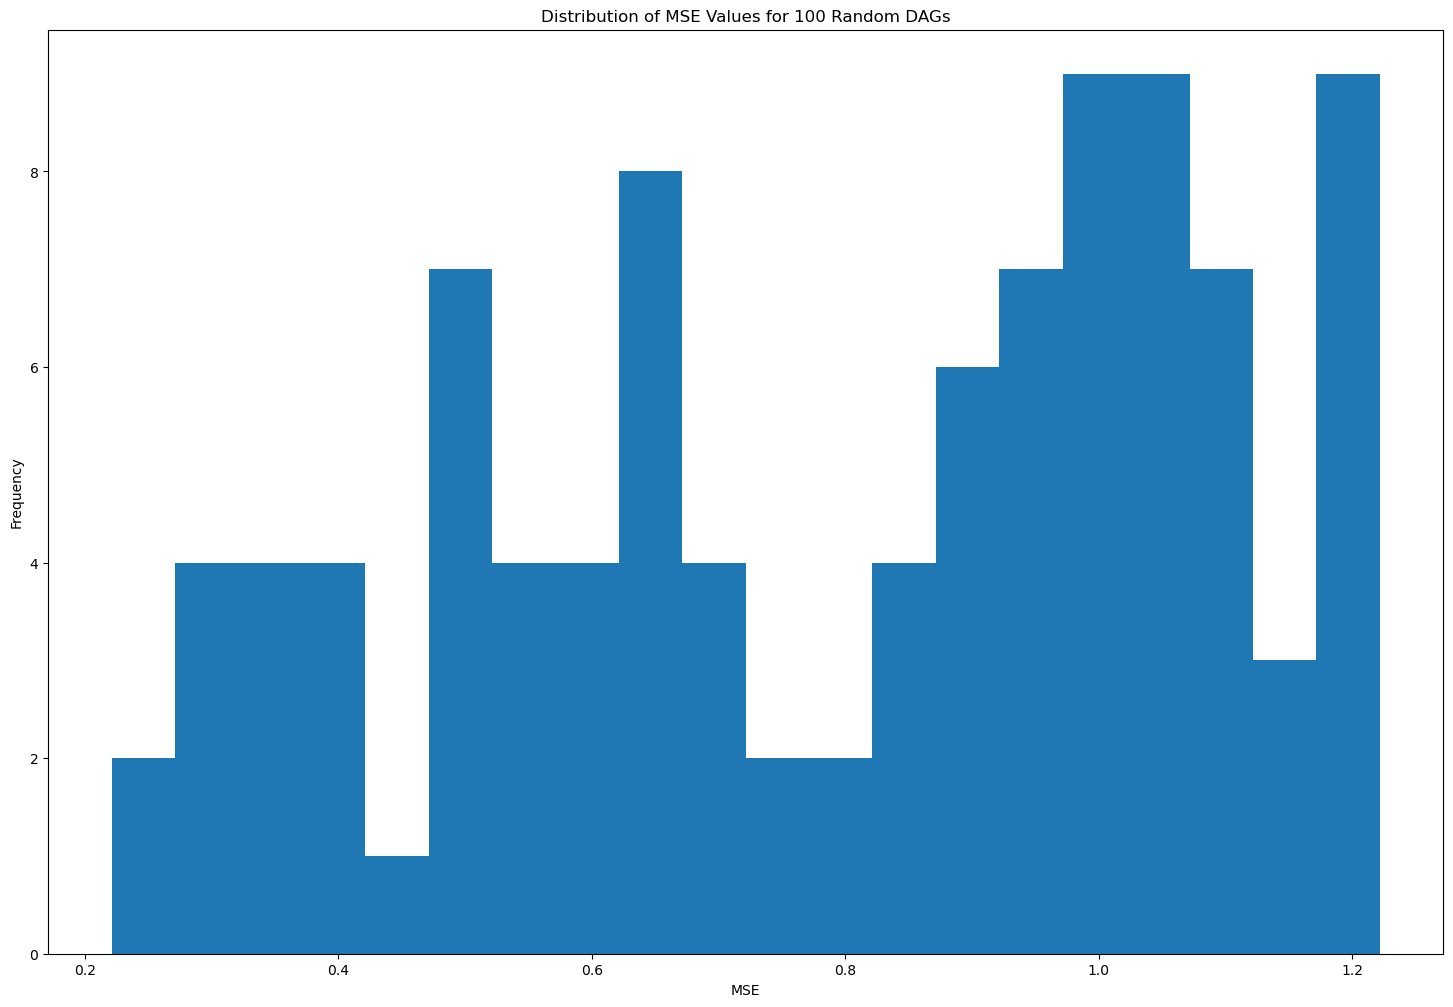

In [12]:
np.random.seed(123)

def generate_data(graph):
    # Create an array to store the data
    data = np.zeros((1000, 20))

    # Generate data for the root nodes
    for u in graph:
        if len(graph[u]) == 0:
            data[:, u] = np.random.normal(loc=0, scale=1, size=1000)

    # Generate data for the non-root nodes
    for u in graph:
        if len(graph[u]) > 0:
            for i in range(1000):
                noise = np.random.normal(loc=0, scale=1)
                parent_sum = sum(data[i, v] for v in graph[u])
                data[i, u] = parent_sum + noise

    return data

def generate_dags(num_dags, V, E):
    dags = []
    for i in range(num_dags):
        graph = {j: set() for j in range(V)}
        edges = []
        for j in range(V):
            for k in range(j+1, V):
                edges.append((j,k))
        np.random.shuffle(edges)
        for j in range(E):
            u, v = edges[j]
            if u < v and not any(u in graph[p] for p in graph[v]):
                graph[u].add(v)
        dags.append(graph)
    return dags

dags = generate_dags(100, 20, 20)
mses = []
for graph in dags:
    data = generate_data(graph)
    df = pd.DataFrame(data, columns=[f'V{i}' for i in range(20)])
    X = df.drop('V13', axis=1)
    y = df['V13']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)
    lasso = Lasso(alpha=0.2)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mses.append(mse)
    
fig=plt.figure(figsize = (18, 12))
# Plot a histogram of the MSE values
plt.hist(mses, bins=20)
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Distribution of MSE Values for 100 Random DAGs')
plt.show()
fig.savefig('Pic3.png', dpi=fig.dpi)

# Code Testing

In [13]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(data.columns)
# Load your data into a pandas DataFrame
# Assuming you have a DataFrame called 'data' with your features and target variable
X = data.drop('LSTAT', axis=1)  # Features
y = data['LSTAT']  # Target variable

# Split the data into train and validation sets with 80/20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Fit Lasso regression model
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

# Get the predicted values on the validation set
y_pred = lasso.predict(X_val)

# Calculate MSE on the validation set
mse = mean_squared_error(y_val, y_pred)
print('Mean Squared Error (MSE):', mse)

# Display selected features and coefficients
selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]
intercept = lasso.intercept_

# Create a DataFrame to display the selected features, coefficients, and intercept
coef_df = pd.DataFrame({'Feature': ['Intercept'] + selected_features.tolist(), 
                        'Coefficient': [intercept] + coefficients.tolist()})
print(coef_df)

# Test data show code and result are valid

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Mean Squared Error (MSE): 20.68754736675807
      Feature  Coefficient
0   Intercept    12.825347
1        CRIM     1.104087
2          ZN     0.168170
3       INDUS     0.801710
4        CHAS    -0.057252
5         NOX     0.370151
6          RM    -2.760398
7         AGE     2.190717
8         TAX     0.030417
9     PTRATIO     0.302339
10          B    -0.998689
